   Episode       Reward  Length  TotalSteps
0        0 -1472.487976     200         201
1        1  -641.464410     200         401
2        2 -1063.455854     200         601
3        3 -1683.901956     200         801
4        4 -1454.562675     200        1001


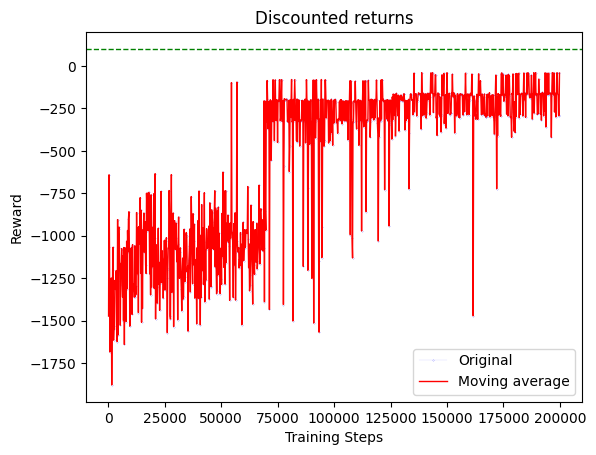

In [5]:
import pandas as pd
episode_df = pd.read_csv("logdir/Pendulum-v1_200000__2023_06_17_11_09.csv")

print(episode_df.head())

import matplotlib.pyplot as plt

METRIC = "Reward"
ROLLING_WINDOW = 50
FROM = 0
UNTIL = 1000000
BEST_RESULTS_NO_OBS_COST = 100-0.4

metrics_df_no_na = episode_df.dropna(how='any', subset=[METRIC, 'TotalSteps'])

# Filter the DataFrame for TotalSteps > FROM and TotalSteps < UNTIL
filtered_df = metrics_df_no_na[(metrics_df_no_na['TotalSteps'] > FROM) & (metrics_df_no_na['TotalSteps'] < UNTIL)]

# Calculate the moving average using a window size of ROLLING_WINDOW
filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(filtered_df['TotalSteps'], filtered_df[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(filtered_df['TotalSteps'], filtered_df['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axhline(y=BEST_RESULTS_NO_OBS_COST, color='g', linestyle='--', linewidth=1)

plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title('Discounted returns')
plt.legend(['Original', 'Moving average'])
plt.show()
